MAE: 8.50
RMSE: 16.52
R²: 0.74


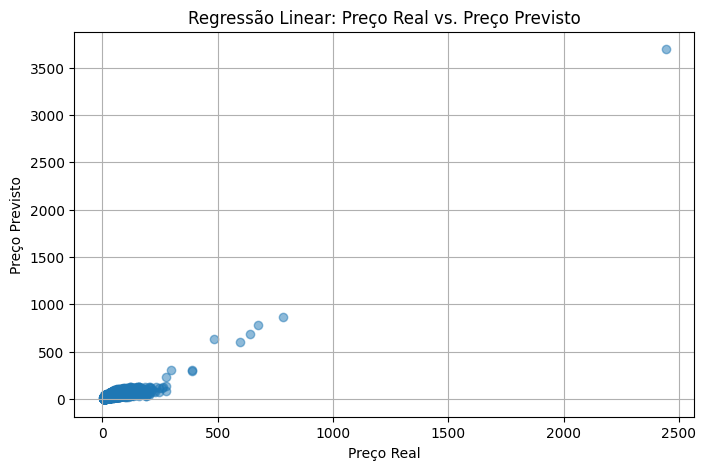

In [8]:
# bibliotecas
!pip install geopy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from geopy.distance import geodesic
import matplotlib.pyplot as plt


df = pd.read_csv("base.csv", sep=';')

# Calcular a distância entre origem e destino usando lat/lng (aproximadas pois geodesc não traz a distância exata)
def calcular_distancia(row):
    origem = (row['lat_origem'], row['lng_origem'])
    destino = (row['lat_destino'], row['lng_destino'])
    return geodesic(origem, destino).km

df['distancia_km'] = df.apply(calcular_distancia, axis=1)

# Selecionar as colunas que serão utilizadas
df_modelo = df[['ano', 'mes', 'dia_semana', 'productid', 'distancia_km', 'price']].dropna()

# Tratar variáveis categóricas com OneHotEncoding
categoricas = ['ano', 'mes', 'dia_semana', 'productid']
df_dummies = pd.get_dummies(df_modelo, columns=categoricas, drop_first=True)

# Separar X (variáveis preditoras) e y (preço)
X = df_dummies.drop('price', axis=1)
y = df_dummies['price']

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Avaliar o modelo
y_pred = modelo.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# Visualizar previsão vs. valores reais em um gráfico
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Regressão Linear: Preço Real vs. Preço Previsto")
plt.grid(True)
plt.show()
